In [1]:
import sys

import numpy as np
from matplotlib import pyplot as plt

from scipy.stats import chi2, norm

sys.path.append('..')
from higgs_inference import settings
from higgs_inference.various.utils import format_number, weighted_quantile

# Load data

In [11]:
# Get r(x | theta0, theta1) drawn according to theta1 for 1017 different values of theta0
r_test = np.load('../data/unweighted_events/r_test.npy')
r_test[:,:] = r_test[:,:] / r_test[settings.theta_observed,:]

# Expectation values over x
expected_r = np.mean(r_test, axis=1)
llr_effect = -2. * 36. * np.log(1. / expected_r)

# Get E[log r(x | theta0, theta1) | theta1] for truth and estimaotr
true_expected_llr = -0.5 / 36. * np.load('../results/truth/llr_truth.npy')
#true_expected_llr -= true_expected_llr[settings.theta_observed]
estimated_expected_llr = -0.5 / 36. * np.load('../results/parameterized/llr_combined_calibrated_deep_new.npy')
#estimated_expected_llr -= estimated_expected_llr[settings.theta_observed]

error = estimated_expected_llr - true_expected_llr

# Plot over theta

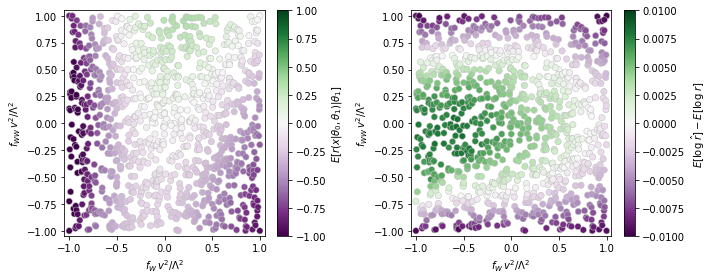

In [12]:
plt.figure(figsize=(10,4))



plt.subplot(1,2,1)

plt.scatter(settings.thetas[:,0], settings.thetas[:,1], c=llr_effect,
            s=40.,
            edgecolor='0.75', lw=0.5,
            cmap='PRGn',
            vmin=-1., vmax=1.)

cbar = plt.colorbar()

plt.xlim(-1.05,1.05)
plt.ylim(-1.05,1.05)
plt.xlabel(r"$f_{W} \, v^2 / \Lambda^2$")
plt.ylabel(r"$f_{WW} \, v^2 / \Lambda^2$")
cbar.set_label(r'$E[r(x | \theta_0, \theta_1) | \theta_1]$')



plt.subplot(1,2,2)

plt.scatter(settings.thetas[:,0], settings.thetas[:,1], c=error,
            s=40.,
            edgecolor='0.75', lw=0.5,
            cmap='PRGn',
            vmin=-0.01, vmax=0.01)

cbar = plt.colorbar()

plt.xlim(-1.05,1.05)
plt.ylim(-1.05,1.05)
plt.xlabel(r"$f_{W} \, v^2 / \Lambda^2$")
plt.ylabel(r"$f_{WW} \, v^2 / \Lambda^2$")
cbar.set_label(r'$E[\log \ \hat{r}] - E[\log \ r]$')


plt.tight_layout()
plt.show()